In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems

mdl.xsection('default', 1e8, 50000)
xt = mdl.xsection('truss', 50e3, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  0.0, 4.0)
mdl.node('3',  8.0, 0.0)
mdl.node('4',  8.0, 4.0)


mdl.node('5',  4.0,10.0)

mdl.node('6',  4.0,16.0)

mdl.node('7', 0.0, 20)
mdl.node('8', 8.0, 20)

mdl.node('9', 4.0, 24)




mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['3'], n['4'])
mdl.truss('c', n['2'], n['4'], xsec=xt)
mdl.beam('d', n['2'], n['5'])
mdl.beam('e', n['4'], n['5'])

mdl.beam('f', n['5'], n['6'])

mdl.beam('g', n['6'], n['7'])
mdl.beam('h', n['6'], n['8'])


mdl.beam('i', n['6'], n['9'])

mdl.pin(n['1'])
mdl.pin(n['3'])

mdl.numDOF()

[[24, 25, 1],
 [2, 3, 4],
 [26, 27, 5],
 [6, 7, 8],
 [9, 10, 11],
 [12, 13, 14],
 [15, 16, 17],
 [18, 19, 20],
 [21, 22, 23]]

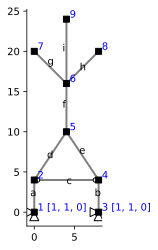

In [3]:
fig1, ax1 = plt.subplots(1,1)
em.plot_structure(mdl, ax1, labeled=True)

In [4]:
n['5'].p['x'] = 60

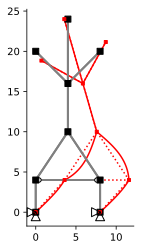

In [6]:
fig2, ax2 = plt.subplots()
U_disp, P = em.analysis.SolveDispl(mdl) 
em.plot_U(mdl, U_disp, ax2, scale=100)

In [9]:
V, Q = em.Localize(U_disp, P)
Q.round(4)

array([  75.    ,   -0.    ,  120.    ,  -75.    ,   -0.    ,  120.    ,
         -0.    ,   79.0448, -120.    ,   -0.    ,  -79.0448, -120.    ,
         -0.    ,    0.    ,    0.    ,   -0.    ,   -0.    ,    0.    ,
         -0.    ,    0.    ,    0.    ,   -0.    ,    0.    ,   -0.    ,
         -0.    ])